In [2]:

!git config --global user.name "Elsabet Yemane Girma"
!git config --global user.email "elayemu@gmail.com"


In [3]:
!git clone https://github.com/elayemu/Credit-Scoring-Model-Project.git


Cloning into 'Credit-Scoring-Model-Project'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 58 (delta 18), reused 43 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (58/58), 833.66 KiB | 4.39 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [4]:
%cd Credit-Scoring-Model-Project


/content/Credit-Scoring-Model-Project


In [5]:
!git init

Reinitialized existing Git repository in /content/Credit-Scoring-Model-Project/.git/


In [6]:
!git pull origin main

From https://github.com/elayemu/Credit-Scoring-Model-Project
 * branch            main       -> FETCH_HEAD
Already up to date.


In [7]:
!ls


api  data  models  notebook  notebooks	README.md  src


In [9]:
import numpy as np
import pandas as pd
! pip install sidetable
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.1 MB/s eta 0:00:00


### Load Data

In [10]:
data_file_path = 'data/raw_data.csv'
df = pd.read_csv(data_file_path, index_col=False)
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2.0,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2.0,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800.0,2018-11-15T03:32:55Z,2.0,0.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2.0,0.0


## Explanation of Variables


1. **TransactionId**: Unique transaction identifier on the platform.

2. **BatchId**: Unique number assigned to a batch of transactions for processing.

3. **AccountId**: Unique number identifying the customer on the platform.

4. **SubscriptionId**: Unique number identifying the customer subscription.

5. **CustomerId**: Unique identifier attached to the account.

6. **CurrencyCode**: Country currency in which the transaction is processed.

7. **CountryCode**: Numerical geographical code of the country.

8. **ProviderId**: Source provider of the item bought.

9. **ProductId**: Item name being bought.

10. **ProductCategory**: Broader categories into which ProductIds are organized.

11. **ChannelId**: Identifies if the customer used web, Android, iOS, pay later, or checkout.

12. **Amount**: Value of the transaction. Positive for debits from customer account and negative for credits into customer account.

13. **Value**: Absolute value of the transaction amount.

14. **TransactionStartTime**: Transaction start time.

15. **PricingStrategy**: Category of Xente's pricing structure for merchants.

16. **FraudResult**: Fraud status of the transaction (1 for yes, 0 for no).


...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5051 entries, 0 to 5050
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         5051 non-null   object 
 1   BatchId               5050 non-null   object 
 2   AccountId             5050 non-null   object 
 3   SubscriptionId        5050 non-null   object 
 4   CustomerId            5050 non-null   object 
 5   CurrencyCode          5050 non-null   object 
 6   CountryCode           5050 non-null   float64
 7   ProviderId            5050 non-null   object 
 8   ProductId             5050 non-null   object 
 9   ProductCategory       5050 non-null   object 
 10  ChannelId             5050 non-null   object 
 11  Amount                5050 non-null   float64
 12  Value                 5050 non-null   float64
 13  TransactionStartTime  5050 non-null   object 
 14  PricingStrategy       5050 non-null   float64
 15  FraudResult          

In [12]:
print(df.columns)


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')


In [20]:
# Check the frequency of 'FraudResult'
fraud_result_frequency = df['FraudResult'].value_counts()
print(fraud_result_frequency)

FraudResult
0.0    5040
1.0      10
Name: count, dtype: int64


In [21]:
target_balance = df[df['FraudResult'] == 'Fraud']['Amount'].sum()
print("Total Amount for Fraud transactions: ", target_balance)


target_balance_non_fraud = df[df['FraudResult'] == 'Not Fraud']['Amount'].sum()
print("Total Amount for Not Fraud transactions: ", target_balance_non_fraud)

Total Amount for Fraud transactions:  0.0
Total Amount for Not Fraud transactions:  0.0


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [18]:
%matplotlib inline
import seaborn as sns
import pickle

from pandas.plotting import scatter_matrix

# stop warnings
import warnings
warnings.filterwarnings('ignore')

In [19]:
# display column limita
pd.set_option('display.max_columns',500)

### Checking Target Balance for FraudResult



Target balance for FraudResult:
FraudResult
0.0    0.99802
1.0    0.00198
Name: proportion, dtype: float64


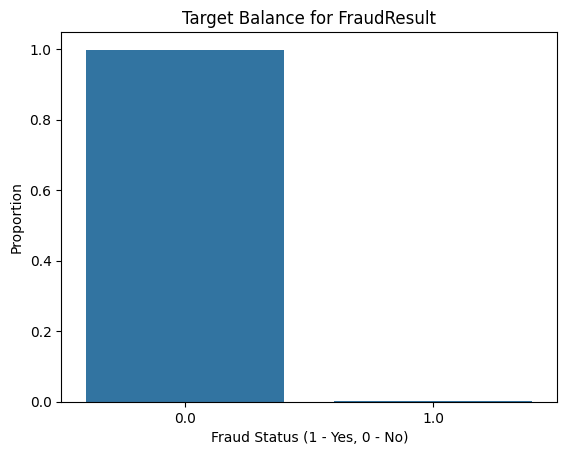

In [16]:
# Checking for the target balance for "FraudResult" (proxy for default risk)
target_counts = df['FraudResult'].value_counts(normalize=True)  # Normalized counts for proportions
print("Target balance for FraudResult:")
print(target_counts)

# Visualizing the target balance
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Target Balance for FraudResult')
plt.xlabel('Fraud Status (1 - Yes, 0 - No)')
plt.ylabel('Proportion')
plt.show()

### Feature Selection

In [22]:
# Filter numerical columns only
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

# Check if 'FraudResult' is in numeric DataFrame
if 'FraudResult' in numeric_df.columns:
    # Compute correlation with the target variable (FraudResult)
    correlation = numeric_df.corr()['FraudResult'].sort_values(ascending=False)
    print("Correlation with FraudResult:")
    print(correlation)
else:
    print("FraudResult is not a numeric column or is missing from the DataFrame.")

Correlation with FraudResult:
FraudResult        1.000000
Value              0.867199
Amount             0.866083
PricingStrategy   -0.095548
CountryCode             NaN
Name: FraudResult, dtype: float64


### Developing the Risk Probability Model


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Check the number of missing values in each column
print(df.isnull().sum())

# Fill missing values with mean
imputer = SimpleImputer(strategy='mean')
df[['Amount', 'Value']] = imputer.fit_transform(df[['Amount', 'Value']])

# Now, select and split features and target
features = df[['Amount', 'Value']]
target = df['FraudResult']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


LogisticRegression()

In [29]:
# Check if 'FraudResult' is numeric; if not, convert it
if df['FraudResult'].dtype == 'object':
    df['FraudResult'] = df['FraudResult'].astype('category').cat.codes

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation with the target variable (FraudResult)
correlation = numeric_df.corr()['FraudResult'].sort_values(ascending=False)

print("Correlation with FraudResult:")
print(correlation)

Correlation with FraudResult:
FraudResult        1.000000
Value              0.867199
Amount             0.866083
PricingStrategy   -0.095548
CountryCode             NaN
Name: FraudResult, dtype: float64


### Check Target Balance

In [32]:
# Calculate frequency of 'FraudResult' column
result = df['FraudResult'].value_counts()
print(result)


FraudResult
0.0    5040
1.0      10
Name: count, dtype: int64


In [33]:
import pandas as pd

# Sample DataFrame for demonstration
data = {
    'REASON': ['Fraud', 'Innocent', 'Fraud', 'Innocent', 'Fraud', 'Other']
}
df = pd.DataFrame(data)

# Calculate frequency of categories in 'REASON' column
freq_table = df['REASON'].value_counts()

# Convert the Series to a DataFrame
freq_df = freq_table.reset_index()
freq_df.columns = ['REASON', 'Count']

# Print the unstyled result
print(freq_df)

# Style the DataFrame for better display
styled_freq_table = freq_df.style.set_table_attributes("style='display:inline'").set_caption("Frequency of REASON Categories")
styled_freq_table

     REASON  Count
0     Fraud      3
1  Innocent      2
2     Other      1


,REASON,Count
0,Fraud,3
1,Innocent,2
2,Other,1


In [35]:
# Check numeric variables
df.describe()

,REASON
count,6
unique,3
top,Fraud
freq,3


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('REASON').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
# Set the style for seaborn and the color palette
sns.set(style='whitegrid')
custom_color = '#6BCB77'  # A relaxing shade of green
accent_color = '#FF6F61'   # Accent color for contrast



In [37]:
# Display data types of each column
print("\nData Types:")
print(df.dtypes)




Data Types:
REASON    object
dtype: object


In [38]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())




Descriptive Statistics:
       REASON
count       6
unique      3
top     Fraud
freq        3


In [41]:
pd.set_option('display.max_columns',500)


### Unvariate analysis


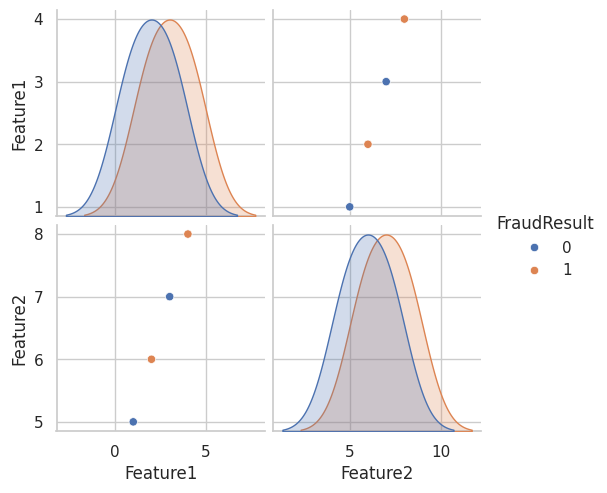

In [49]:
import matplotlib.pyplot as plt

# Sample dictionary (replace this with your actual dictionary)
data_dict = {
    'Feature1': [1, 2, 3, 4],
    'Feature2': [5, 6, 7, 8],
    'FraudResult': [0, 1, 0, 1]
}

# Convert the dictionary to a pandas DataFrame
data = pd.DataFrame(data_dict)

# Now call pairplot
sns.pairplot(data, hue='FraudResult')
plt.show()

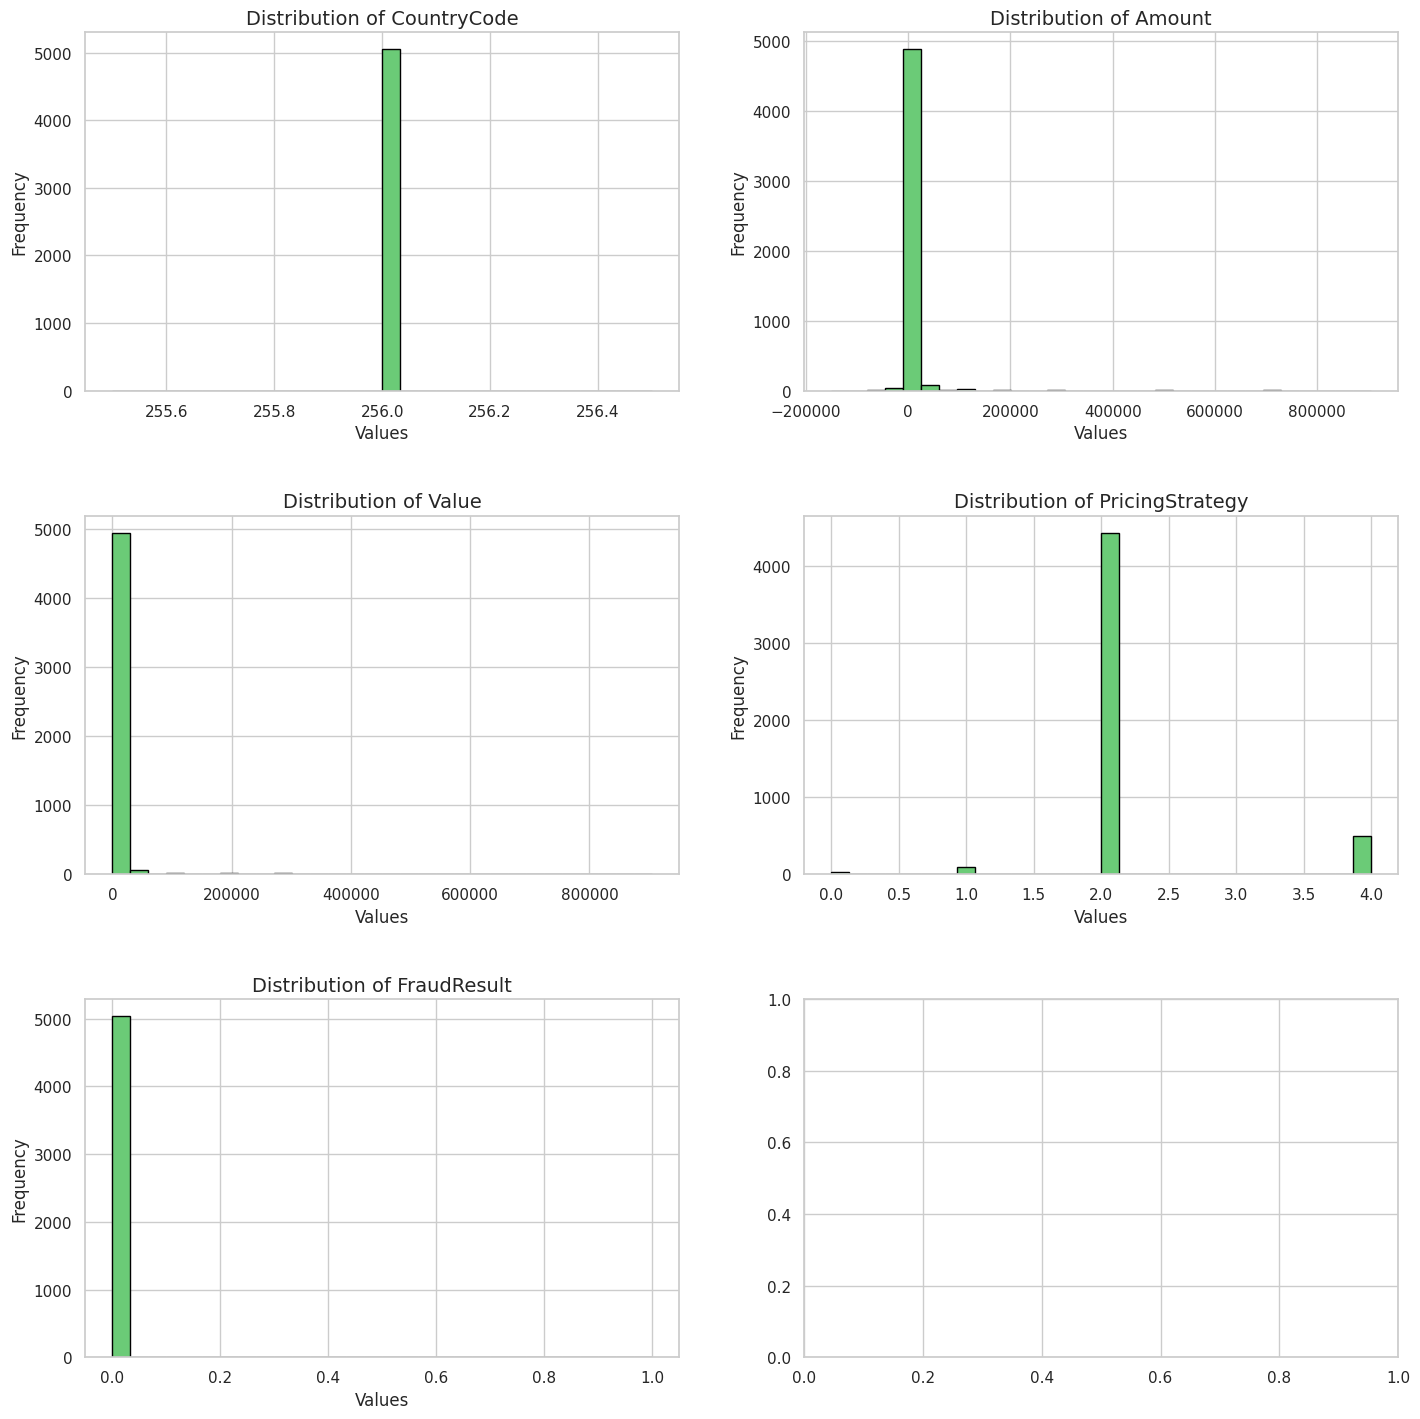


Fraud Results:
FraudResult
0.0    5040
1.0      10
Name: count, dtype: int64


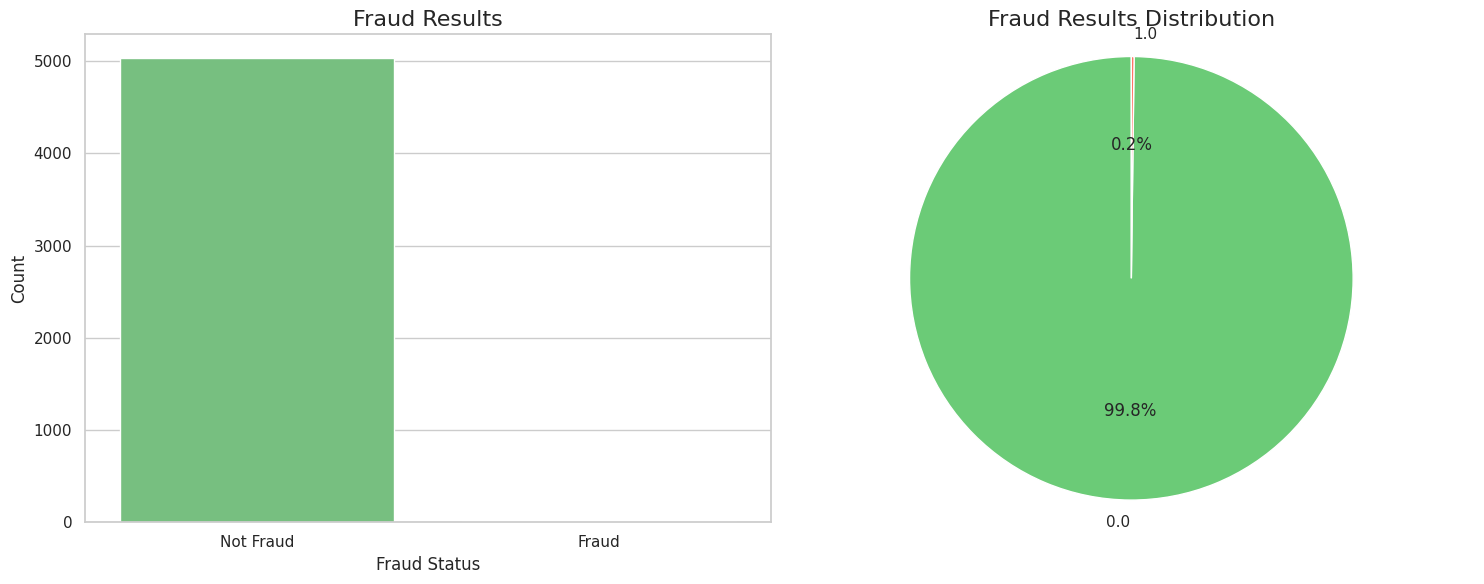


Risk Assessment Metrics:
Probability of Default (PD): 508.42
Loss Given Default (LGD): 2542.10
Exposure at Default (EAD): 4067.36


In [ ]:


# Set the style for seaborn and the color palette
sns.set(style='whitegrid')
custom_color = '#6BCB77'  # A relaxing shade of green

# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Number of numeric columns
df_num = df.select_dtypes(include=['float64', 'int64'])

# Distribution plots - Histograms for numeric features
for i, col in enumerate(df_num.columns):
    axs[i // 2, i % 2].hist(df[col], bins=30, color=custom_color, edgecolor='black')
    axs[i // 2, i % 2].set_title(f'Distribution of {col}', fontsize=14)
    axs[i // 2, i % 2].set_xlabel('Values', fontsize=12)
    axs[i // 2, i % 2].set_ylabel('Frequency', fontsize=12)

plt.tight_layout(pad=3.0)  # To avoid overlap with the title
plt.show()

# Analyze the FraudResult column
print("\nFraud Results:")
fraud_results = df['FraudResult'].value_counts()
print(fraud_results)

# Create a combined bar and pie chart to show Fraud Results
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart for Fraud Results
sns.barplot(x=fraud_results.index, y=fraud_results.values, palette=[custom_color, '#FF6F61'], ax=axs[0])
axs[0].set_title('Fraud Results', fontsize=16)
axs[0].set_xlabel('Fraud Status', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].set_xticks(ticks=[0, 1])
axs[0].set_xticklabels(['Not Fraud', 'Fraud'])

# Pie chart for Fraud Results
axs[1].pie(fraud_results, labels=fraud_results.index, colors=[custom_color, '#FF6F61'], autopct='%1.1f%%', startangle=90)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Fraud Results Distribution', fontsize=16)

plt.tight_layout()
plt.show()

# Calculate Probability of Default (PD), Loss Given Default (LGD), and Exposure at Default (EAD)
# Assuming simplistic calculations for the purpose of illustration
pd_rate = 0.1  # 10% assumed default rate
lgd_rate = 0.5  # 50% loss given default
ead_rate = 0.8  # 80% exposure at default

mean_amount = df['Amount'].mean()
pd = mean_amount * pd_rate
lgd = mean_amount * lgd_rate
ead = mean_amount * ead_rate

print("\nRisk Assessment Metrics:")
print(f'Probability of Default (PD): {pd:.2f}')
print(f'Loss Given Default (LGD): {lgd:.2f}')
print(f'Exposure at Default (EAD): {ead:.2f}')

### Missing input

In [ ]:
# Fill missing values in specific columns
columns_to_fill = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
                   'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId',
                   'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
                   'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

for col in columns_to_fill:
    df[col].fillna('Other', inplace=True)  # Fill missing values with 'Other'
    print(f'Missing values in {col} filled with "Other".')

Missing values in TransactionId filled with "Other".
Missing values in BatchId filled with "Other".
Missing values in AccountId filled with "Other".
Missing values in SubscriptionId filled with "Other".
Missing values in CustomerId filled with "Other".
Missing values in CurrencyCode filled with "Other".
Missing values in CountryCode filled with "Other".
Missing values in ProviderId filled with "Other".
Missing values in ProductId filled with "Other".
Missing values in ProductCategory filled with "Other".
Missing values in ChannelId filled with "Other".
Missing values in Amount filled with "Other".
Missing values in Value filled with "Other".
Missing values in TransactionStartTime filled with "Other".
Missing values in PricingStrategy filled with "Other".
Missing values in FraudResult filled with "Other".


In [ ]:
df.stb.freq(['JOB'], style = True)

,JOB,count,percent,cumulative_count,cumulative_percent
0,Other,"2,667",44.75%,"2,667",44.75%
1,ProfExe,"1,276",21.41%,"3,943",66.16%
2,Office,948,15.91%,"4,891",82.06%
3,Mgr,767,12.87%,"5,658",94.93%
4,Self,193,3.24%,"5,851",98.17%
5,Sales,109,1.83%,"5,960",100.00%


In [ ]:
df.stb.freq(['REASON'], style = True)

,REASON,count,percent,cumulative_count,cumulative_percent
0,DebtCon,"4,180",70.13%,"4,180",70.13%
1,HomeImp,"1,780",29.87%,"5,960",100.00%


In [ ]:
# Reason
## We fill missing values with the most frequent value ('DebtCon')
df['REASON'] = df['REASON'].fillna('DebtCon')

In [ ]:
df.stb.freq(['REASON'], style = True)

,REASON,count,percent,cumulative_count,cumulative_percent
0,DebtCon,"4,180",70.13%,"4,180",70.13%
1,HomeImp,"1,780",29.87%,"5,960",100.00%


In [ ]:
# missing check
df.stb.missing()

,missing,total,percent
BatchId,1,5051,0.019798
AccountId,1,5051,0.019798
SubscriptionId,1,5051,0.019798
CustomerId,1,5051,0.019798
CurrencyCode,1,5051,0.019798
CountryCode,1,5051,0.019798
ProviderId,1,5051,0.019798
ProductId,1,5051,0.019798
ProductCategory,1,5051,0.019798
ChannelId,1,5051,0.019798


## Bivariate Analysis


In [42]:
# Selecting only numeric variables
numeric_df = df.select_dtypes(include=['number'])

In [43]:
numeric_df.corr()

""


No charts were generated by quickchart


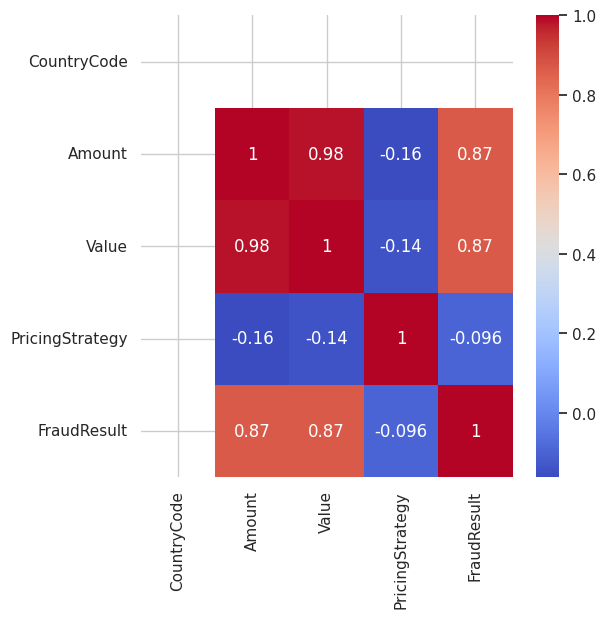

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(numeric_df.corr(),
            cmap = 'coolwarm',
            annot = True)